<a href="https://colab.research.google.com/github/flo-shi/Recommender-System/blob/master/recommenda_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats # For statistical functions
from sklearn.model_selection import train_test_split # Splitting train and test data
from sklearn.metrics.pairwise import cosine_similarity # For user to user similarities
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing datasets

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Books.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Ratings.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Users.csv')

<ipython-input-3-09f4737577b5>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Recommender system/Books.csv')


Understanding this dataset

In [4]:
# df1 Books
print(df1.shape) # No of rows and columns
df1.head() # First 5 rows in the dataset

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
df1.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
df1.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [7]:
# df2 Ratings
print(df2.shape)
df2.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# df3 Users
print(df3.shape)
df3.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df1.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [10]:
df3.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


Data Cleaning

In [11]:
df1.duplicated() #  Check for duplicates in rows

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [12]:
df2.duplicated()


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [13]:
df3.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [14]:
df1.nunique().sort_values(ascending=False)

ISBN                   271360
Book-Title             242135
Book-Author            102023
Publisher               16807
Year-Of-Publication       202
dtype: int64

In [15]:
df1['Year-Of-Publication'] = pd.to_numeric(df1['Year-Of-Publication'], errors='coerce')

In [16]:
# Dealing with null values of df1(Books)
df1.isnull().sum().sort_values(ascending=True)

ISBN                   0
Book-Title             0
Book-Author            1
Publisher              2
Year-Of-Publication    3
dtype: int64

In [17]:
# Remove rows with null values
df1 = df1.dropna(subset=['Book-Author','Publisher','Year-Of-Publication'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


In [19]:
df2.isnull().sum().sort_values(ascending=True)

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [20]:
df3.isnull().sum().sort_values(ascending=True)

User-ID          0
Location         0
Age         110762
dtype: int64

In [21]:
# Dealing with null values of df3(User's age)
df3['Age'].dropna(inplace=True)

Dealing with outliers

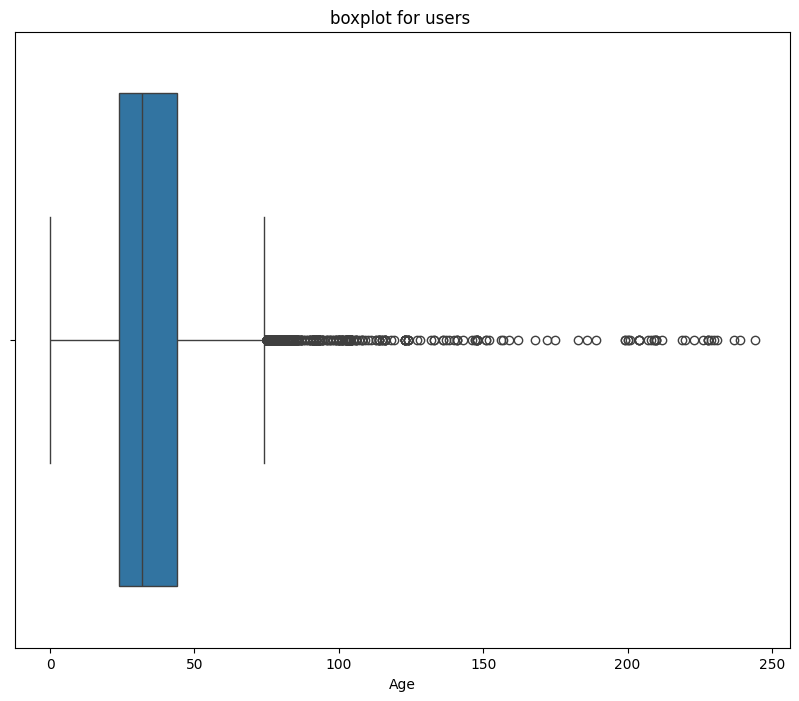

In [22]:
# df3
plt.figure(figsize=(10,8))
plt.title('boxplot for users ')
sns.boxplot(data=df3, x='Age')
plt.show()

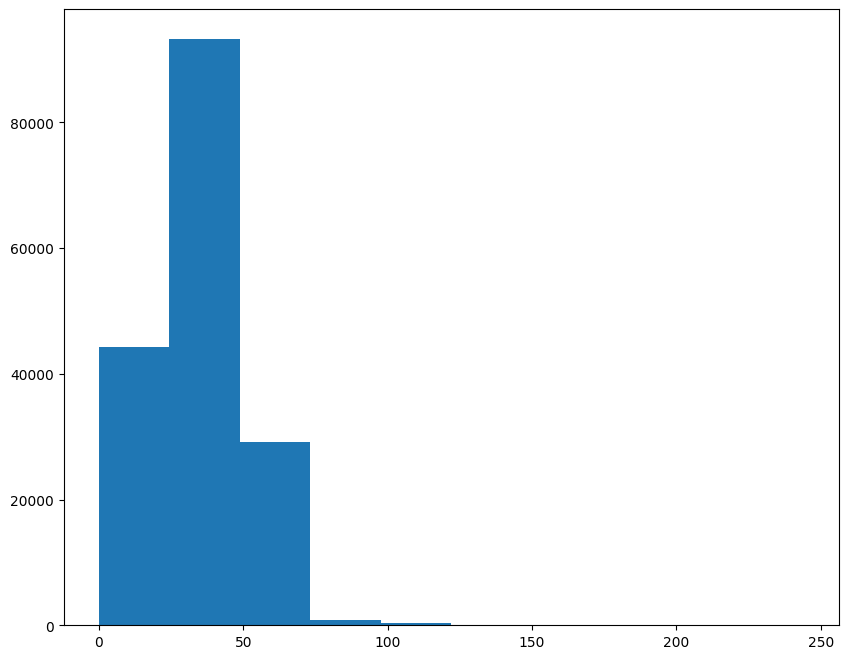

In [23]:
plt.figure(figsize=(10,8))
plt.hist(data=df3, x = 'Age')
plt.show()

In [24]:
def find_boundaries(data,variable):
    # Finding the IQR
    Q1 = data[variable].quantile(.25)
    Q3 = data[variable].quantile(.75)
    IQR = Q3 - Q1
    # Finding lower and upper bounadry
    l_boundary = Q1 - 1.5 * IQR
    u_boundary = Q3 + 1.5 * IQR
    return l_boundary, u_boundary

l_column , u_column = find_boundaries(df3, 'Age')
print("Lower boundary is: ", l_column)
print("Upper boundary is: ", u_column)


Lower boundary is:  -6.0
Upper boundary is:  74.0


In [25]:
remove = np.where(df3['Age'] > 74, True,
                  np.where(df3['Age'] < 10, True, False))

df3 = df3.loc[~(remove)]


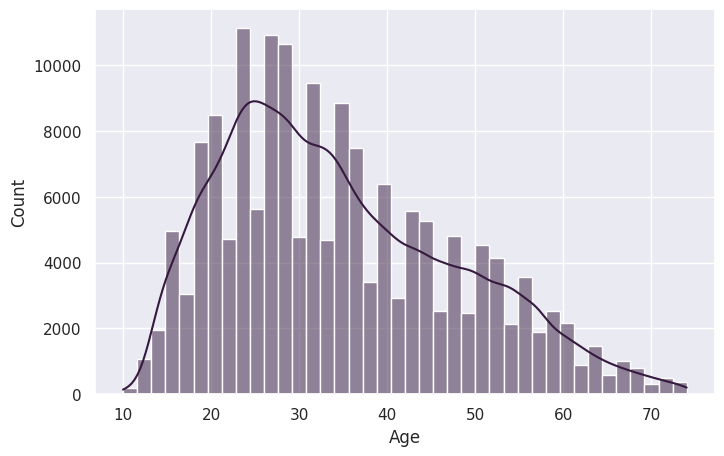

In [26]:
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid',palette="rocket")
ax =  sns.histplot(data=df3, x= 'Age', kde=True, bins=40)

<Axes: ylabel='Age'>

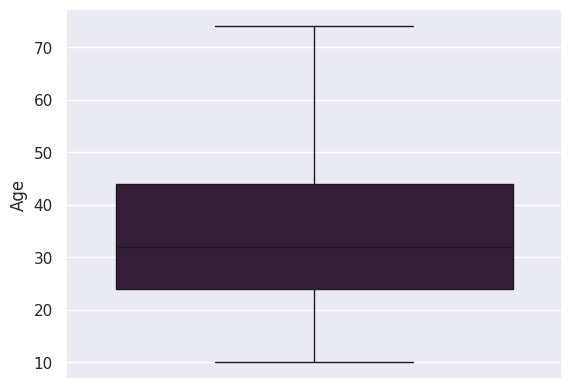

In [27]:
sns.boxplot(df3['Age'])

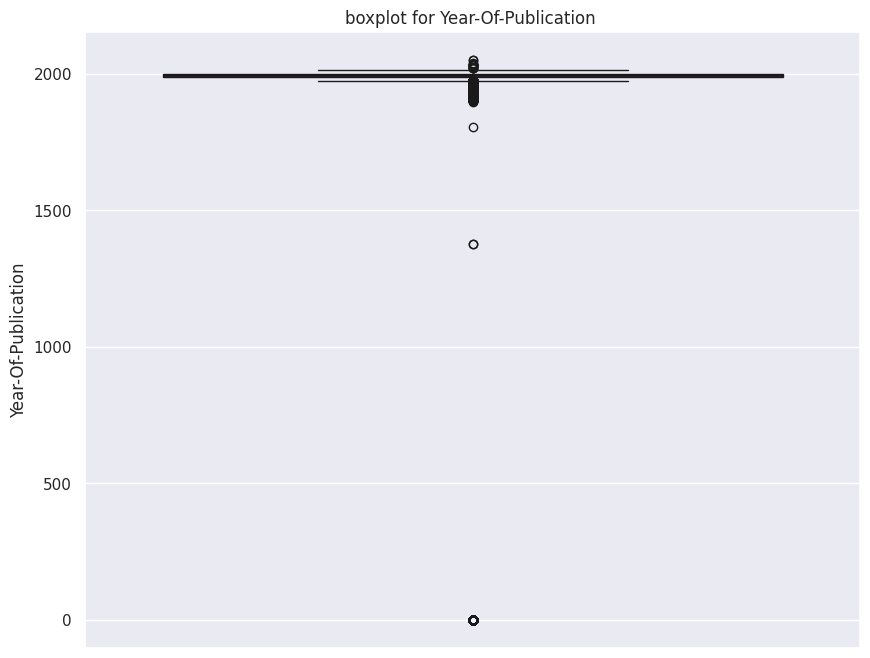

In [28]:
# df1
plt.figure(figsize=(10,8))
plt.title('boxplot for Year-Of-Publication ')
sns.boxplot(df1['Year-Of-Publication'])
plt.show()

<Axes: xlabel='Year-Of-Publication', ylabel='Count'>

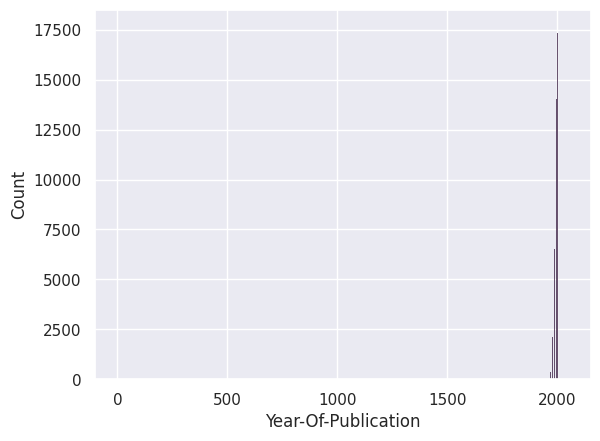

In [29]:
# df1['Year-Of-Publication'].plot(kind='hist')
sns.histplot(df1['Year-Of-Publication'])

In [30]:
lb_column,ub_column = find_boundaries(df1, 'Year-Of-Publication')
print("Lower boundary is: ", lb_column)
print("Upper boundary is: ", ub_column)

Lower boundary is:  1972.5
Upper boundary is:  2016.5


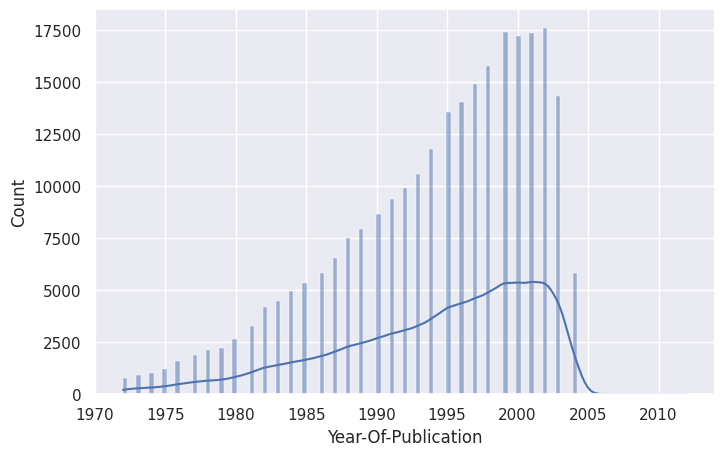

In [31]:
remove_year = np.where(df1['Year-Of-Publication'] < 1972, True,
                       np.where(df1['Year-Of-Publication'] > 2016, True, False))
df1 = df1.loc[~(remove_year)]

# Histogram for year of population
plt.figure(figsize=(8,5))
sns.set_theme(style='darkgrid')
ax = sns.histplot(data=df1, x = 'Year-Of-Publication', kde=True)

Dealing with categorical data

In [32]:
# Construct new attribute
df3['Country'] = df3['Location'].str.extract(r',\s*([^,]+)$')

In [33]:
df3.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [34]:
df3.drop(columns=['Location'], inplace=True)

In [35]:
country_counts = df3['Country'].value_counts()
print(country_counts)

usa                138677
canada              21534
united kingdom      18388
germany             16922
spain               13050
                    ...  
myanmar                 1
carter                  1
usa & canada            1
p.r.china               1
united kingdom.         1
Name: Country, Length: 699, dtype: int64


([<matplotlib.patches.Wedge at 0x7d3db59afc40>,
 [Text(-0.03297701222864079, 1.099505578278015, 'usa'),
  Text(-1.0480560696594037, -0.3340336432907368, 'canada'),
  Text(-0.790185819688052, -0.765249221080245, 'united kingdom'),
  Text(-0.4221083580231079, -1.0157876422200833, 'germany'),
  Text(-0.052630156942868433, -1.0987402179679095, 'spain'),
  Text(0.25842658490288245, -1.0692126543468485, 'australia'),
  Text(0.5282154355982186, -0.9648774293120264, 'italy'),
  Text(0.6829035003958567, -0.8623472671418901, 'france'),
  Text(0.74762900832514, -0.8068772310028136, 'portugal'),
  Text(0.8046948917797547, -0.7499774204224877, 'new zealand'),
  Text(0.8551624758049117, -0.6918794258938576, 'netherlands'),
  Text(0.8916456044549484, -0.6441801891211572, 'switzerland'),
  Text(0.9160659414641031, -0.6089525358264686, 'brazil'),
  Text(0.937458296970651, -0.5754754047228142, 'china'),
  Text(0.9560995648817218, -0.5439426642882341, 'sweden'),
  Text(0.9725023411242647, -0.514042018231

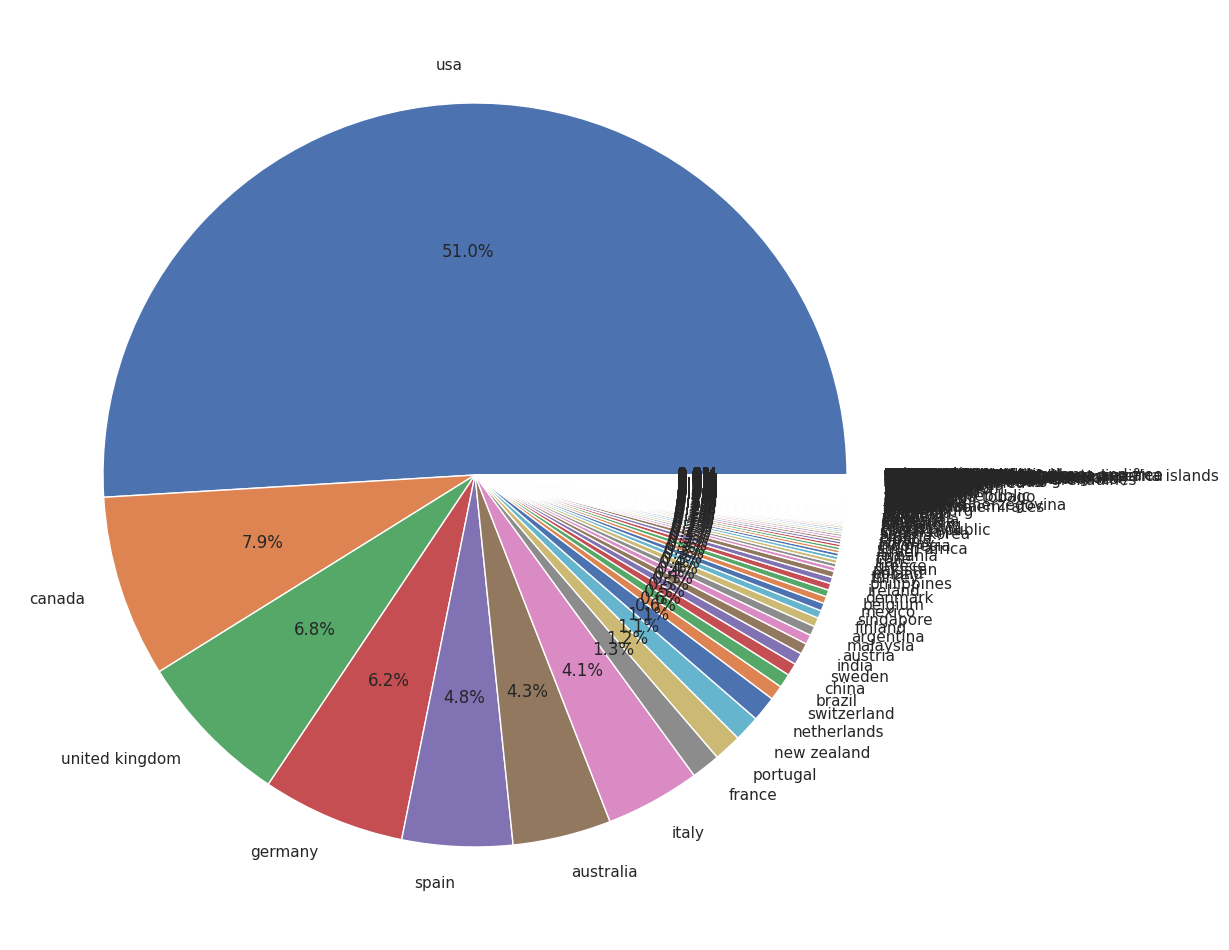

In [36]:
plt.figure(figsize=(12,16))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')

Merging the diferent dataframes

In [37]:
df_merge = pd.merge(df1,df2, on='ISBN', how='inner')

In [38]:
final_df = pd.merge(df_merge, df3, on='User-ID', how='inner')

In [39]:
print(final_df.shape)
final_df.head()

(997948, 9)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,2,0,18.0,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,NaN,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,8,0,NaN,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,8,0,NaN,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,8,0,NaN,canada


In [40]:
# Identifing unique values
print("The total dataset has ", final_df.shape[0]," values.")
print("The dataset has ", final_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", final_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(final_df['Book-Rating'].unique()), " ratings.")



The total dataset has  997948  values.
The dataset has  260351  books with unique values
The dataset has  89539  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


<Axes: >

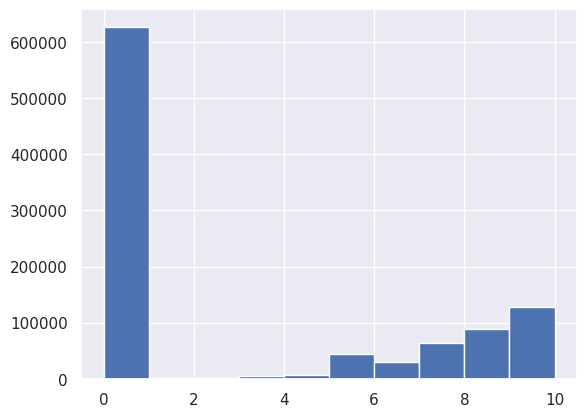

In [41]:
final_df['Book-Rating'].hist()

In [42]:
final_df.isnull().sum().sort_values(ascending=True)

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
User-ID                     0
Book-Rating                 0
Country                 23567
Age                    271701
dtype: int64

In [43]:
final_df.dropna(subset=['Age','Country'], inplace=True)
print(final_df.shape)

(716018, 9)


In [44]:
author_counts = final_df['Book-Author'].value_counts()
print(author_counts)

Stephen King               7435
Nora Roberts               6240
John Grisham               4016
James Patterson            3971
Mary Higgins Clark         3272
                           ... 
Paul Harrison                 1
Louise Boije af GennÃ¤s       1
Kay E. Powell                 1
Kyra Mesich                   1
Michael Gorman                1
Name: Book-Author, Length: 83817, dtype: int64


Transforming categorical data and splitting train and test data

In [45]:
# Divide data into training and vlidation subsets
# Data is split randomly
# x_train, x_test, y_train, y_test = train_test_split(final_df[['Book-Title','User-ID','Book-Author','Publisher','Year-Of-Publication','Book-Rating']]
#                                                     ,final_df['ISBN'], train_size=0.8, test_size=0.2, random_state=0)
# Divide data into training and vlidation subsets
train_df, test_df= train_test_split(final_df[['ISBN','Book-Title','User-ID','Book-Author','Publisher','Year-Of-Publication','Book-Rating']]
                                                    , train_size=0.8, test_size=0.2, random_state=0)
train_df.head()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating
985458,3442441641,Das GummibÃ?Â¤rchen- Orakel.,133482,Dietmar Bittrich,Goldmann,1998.0,0
438957,0743203631,Gap Creek: The Story Of A Marriage,200226,Robert Morgan,Touchstone,2000.0,0
58181,0425132048,Eyes of Prey,55492,John Sandford,Berkley Publishing Group,2004.0,0
209674,0964490234,Timeless Wisdom: Illuminating Thoughts on the ...,30898,Gary Fenchuk,Cake Eaters Inc,2000.0,8
61793,037570387X,The Autograph Man: A Novel (Vintage Internatio...,76352,Zadie Smith,Vintage Books USA,2003.0,0


In [46]:
cat_variable = ['Book-Author','Publisher']

In [47]:
# Frequency Encoding Technique
encoder_dict = {}
for var in cat_variable:
    encoder_dict[var] = (train_df[var].value_counts()/len(train_df)).to_dict()


encoder_dict

{'Book-Author': {'Stephen King': 0.010427468602373546,
  'Nora Roberts': 0.00870963349359478,
  'John Grisham': 0.005575981033983108,
  'James Patterson': 0.005539319918856732,
  'Mary Higgins Clark': 0.004587876692957923,
  'Dean R. Koontz': 0.0044290118607436275,
  'Tom Clancy': 0.003720230301633689,
  'Danielle Steel': 0.0037045183951509566,
  'Sue Grafton': 0.003316958035243552,
  'Janet Evanovich': 0.0032610934788605025,
  'Anne Rice': 0.0032314154332820076,
  'J. K. Rowling': 0.0031092117161940873,
  'V.C. Andrews': 0.0030865167401634736,
  'Rich Shapero': 0.0029468553492058504,
  'Michael Crichton': 0.0028333804690527814,
  'JOHN GRISHAM': 0.002698956380256069,
  'R. L. Stine': 0.0025558034545245054,
  'Nicholas Sparks': 0.0025470746175896538,
  'Sandra Brown': 0.002541837315428743,
  'Dan Brown': 0.0024248709005017335,
  'Patricia Daniels Cornwell': 0.0023044129508007836,
  'Agatha Christie': 0.0022869552769310807,
  'Catherine Coulter': 0.0022031584423565067,
  'Anita Shreve':

In [48]:
# Replace the categorical value with numeric value
for var in cat_variable:
    train_df[var] = train_df[var].map(encoder_dict[var])


In [49]:
print(train_df.shape)
train_df.head()

(572814, 7)


,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating
985458,3442441641,Das GummibÃ?Â¤rchen- Orakel.,133482,0.000019,0.003256,1998.0,0
438957,0743203631,Gap Creek: The Story Of A Marriage,200226,0.000316,0.003060,2000.0,0
58181,0425132048,Eyes of Prey,55492,0.001798,0.027382,2004.0,0
209674,0964490234,Timeless Wisdom: Illuminating Thoughts on the ...,30898,0.000003,0.000003,2000.0,8
61793,037570387X,The Autograph Man: A Novel (Vintage Internatio...,76352,0.000211,0.010480,2003.0,0


In [50]:
# Identifing unique values in the train df
print("The total dataset has ", train_df.shape[0]," values.")
print("The dataset has ", train_df['ISBN'].nunique(), " books with unique values")
print("The dataset has ", train_df['User-ID'].nunique(), " users with unique values")
print("The dataset has ", sorted(train_df['Book-Rating'].unique()), " ratings.")



The total dataset has  572814  values.
The dataset has  191516  books with unique values
The dataset has  45526  users with unique values
The dataset has  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  ratings.


In [51]:
# Group movies by column showing number and mean of rating for each book
agg_rating = train_df.groupby('Book-Title').agg(rating_count = ('Book-Rating','count'),
                                          rating_mean = ('Book-Rating', 'mean')).reset_index()
print(agg_rating)
agg_rating.info()

                                               Book-Title  rating_count  \
0        A Light in the Storm: The Civil War Diary of ...             1   
1                                   Always Have Popsicles             1   
2                    Apple Magic (The Collector's series)             1   
3        Ask Lily (Young Women of Faith: Lily Series, ...             1   
4                                            Dark Justice             1   
...                                                   ...           ...   
172540                   Ã?Â?berraschung am Valentinstag.             2   
172541                                      Ã?Â?lpiraten.             1   
172542                     Ã?Â?rger mit Produkt X. Roman.             4   
172543                              Ã?Â?stlich der Berge.             1   
172544                                  Ã?Â?thique en toc             2   

        rating_mean  
0              0.00  
1              0.00  
2              0.00  
3          

In [52]:
# Filter books with 50+ ratings only
popular_books = agg_rating[agg_rating['rating_count']>= 150]
print(len(popular_books))

150


In [53]:
popular_books.sort_values(by='rating_count', ascending=False).head()


,Book-Title,rating_count,rating_mean
168250,Wild Animus,1688,1.002962
140542,The Lovely Bones: A Novel,706,4.157224
131135,The Da Vinci Code,559,4.440072
20101,Bridget Jones's Diary,484,3.475207
142687,The Nanny Diaries: A Novel,442,3.278281


In [54]:
popular_books.sort_values(by='rating_count', ascending=False).tail()

,Book-Title,rating_count,rating_mean
163085,Vinegar Hill (Oprah's Book Club (Paperback)),152,2.131579
145500,The Prince of Tides,152,2.210526
63224,I Know This Much Is True,151,3.397351
114269,Silence of the Lambs,150,3.673333
125941,The Bad Beginning (A Series of Unfortunate Eve...,150,3.846667


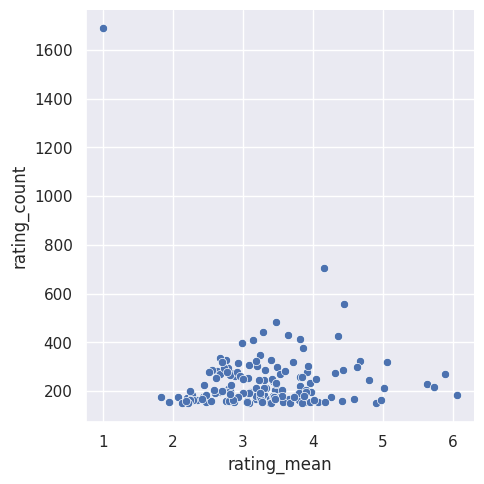

In [55]:
# Checking the relationship between rating count and mean.
sns.relplot(x='rating_mean', y='rating_count', data=popular_books)

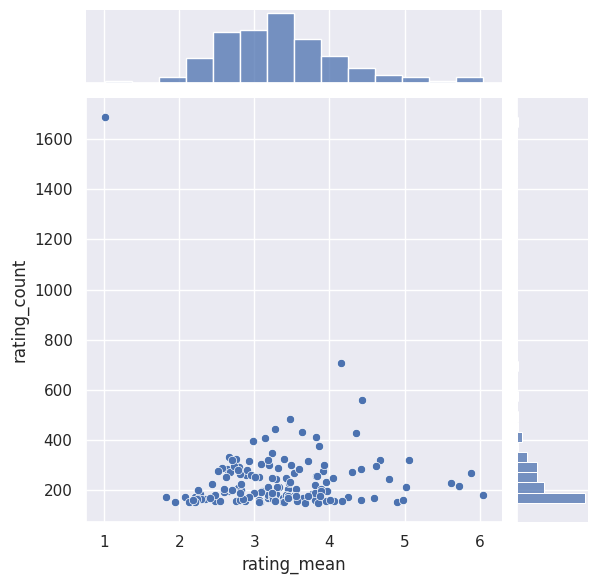

In [56]:
sns.jointplot(x='rating_mean', y='rating_count', data=popular_books) #Better approach

In [57]:
# mearge the popular books and train dataframe
final_train_df = pd.merge(train_df,popular_books, on='Book-Title', how='inner')
final_train_df.head()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,rating_count,rating_mean
0,0739301985,Skipping Christmas,163676,0.002699,0.000522,2002.0,9,162,4.012346
1,0385505833,Skipping Christmas,177375,0.002699,0.003877,2001.0,7,162,4.012346
2,0385505833,Skipping Christmas,121594,0.002699,0.003877,2001.0,6,162,4.012346
3,0385508417,Skipping Christmas,240131,0.002699,0.003877,2002.0,0,162,4.012346
4,0385505833,Skipping Christmas,193676,0.002699,0.003877,2001.0,7,162,4.012346


In [58]:
final_train_df.tail()

,ISBN,Book-Title,User-ID,Book-Author,Publisher,Year-Of-Publication,Book-Rating,rating_count,rating_mean
36100,0395489318,The Fellowship of the Ring (The Lord of the Ri...,254206,0.001016,0.001781,1988.0,10,214,5.014019
36101,0345339703,The Fellowship of the Ring (The Lord of the Ri...,209202,0.001009,0.003130,1986.0,6,214,5.014019
36102,0345339703,The Fellowship of the Ring (The Lord of the Ri...,55955,0.001009,0.003130,1986.0,0,214,5.014019
36103,0618002227,The Fellowship of the Ring (The Lord of the Ri...,52350,0.001016,0.001781,1999.0,9,214,5.014019
36104,0618129030,The Fellowship of the Ring (The Lord of the Ri...,158254,0.001016,0.001781,2001.0,0,214,5.014019


In [59]:
print(final_train_df.shape)
print(final_train_df['User-ID'].nunique())

(36105, 9)
11731


User item Matrix

In [60]:
# User item matrix. Rows = users, column = book , value = rating
matrix = final_train_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
matrix.head(10)

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [61]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis= 'rows')
print(matrix_norm.shape)
matrix_norm.head()

(11731, 150)


Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
matrix_norm.tail()

Book-Title,1984,1st to Die: A Novel,2nd Chance,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,...,Watership Down,We Were the Mulvaneys,When the Wind Blows,Where the Heart Is (Oprah's Book Club (Paperback)),While I Was Gone,Whispers,White Oleander : A Novel,White Oleander : A Novel (Oprah's Book Club),Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
278781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278796,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
278800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-3.777778,NaN,NaN,NaN,NaN,NaN


In [63]:
# Pearson correlation similarity
user_similarity = matrix_norm.T.corr()
user_similarity.head(20)

User-ID,44,51,67,114,165,193,232,242,254,388,...,278586,278653,278692,278723,278755,278781,278796,278798,278800,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Cosine Similarities
c_user_similarity = cosine_similarity(matrix_norm.fillna(0))
c_user_similarity

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
# Using User-ID 1 as an example to find similar users
pick_user = 114

# Remove him from the list
user_similarity.drop(index=pick_user, inplace=True)

# Take a look at the data
user_similarity.head()

User-ID,44,51,67,114,165,193,232,242,254,388,...,278586,278653,278692,278723,278755,278781,278796,278798,278800,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Similarity matrix ranges from -1 to 1. with +ve values means same movie preference and -ve values means opposite movie preference
n = 10. picking out top 10 most similar users
since we are looking for similar interest we will set the threshold to a +ve value 0.3
sort the similarity from highest to lowest


In [67]:
# Number of similar users
n = 10

# User similarity threashold
similarity_threashold = 0.3

# Get top 10 similar users
similar_user = user_similarity[user_similarity[pick_user]>similarity_threashold] [pick_user].sort_values(ascending=False)[:n]

print(f"Similar users for user id {pick_user} are ", similar_user)

Similar users for user id 114 are  User-ID
16106     1.0
24995     1.0
65258     1.0
81318     1.0
95011     1.0
110912    1.0
261829    1.0
Name: 114, dtype: float64


Narrowing down the item pool

In [68]:
# Books that picked user has read
pick_user_read = matrix_norm[matrix_norm.index == pick_user].dropna(axis=1, how='all')
pick_user_read

Book-Title,Angels &amp; Demons,The Beach House
User-ID,,
114,0.5,-0.5


In [69]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_book = matrix_norm[matrix_norm.index.isin(similar_user.index)].dropna(axis=1, how='all')
similar_user_book

Book-Title,1st to Die: A Novel,2nd Chance,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,ANGELA'S ASHES,Angels &amp; Demons,...,The Summons,The Testament,Timeline,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Vinegar Hill (Oprah's Book Club (Paperback)),Violets Are Blue,We Were the Mulvaneys,When the Wind Blows,Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
16106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.733333,...,NaN,NaN,NaN,NaN,NaN,-2.266667,NaN,NaN,4.733333,NaN
24995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81318,NaN,NaN,-1.625000,NaN,NaN,NaN,NaN,NaN,NaN,1.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110912,5.478723,-3.521277,-3.521277,NaN,-3.521277,NaN,6.478723,NaN,5.478723,5.478723,...,NaN,NaN,-3.521277,1.478723,5.478723,5.478723,-3.521277,NaN,-3.521277,NaN
261829,NaN,4.087500,NaN,-3.4125,-3.412500,-3.4125,NaN,3.5875,NaN,5.587500,...,3.5875,-3.4125,NaN,NaN,NaN,4.587500,NaN,-3.4125,NaN,-3.4125


In [70]:
# Remove books watched by target user and keep books similar users read
for column in pick_user_read.columns:
    if column in similar_user_book.columns:
        similar_user_book[column].dropna(inplace=True)

similar_user_book

Book-Title,1st to Die: A Novel,2nd Chance,A Bend in the Road,A Heartbreaking Work of Staggering Genius,A Map of the World,A Painted House,A Prayer for Owen Meany,A Time to Kill,ANGELA'S ASHES,Angels &amp; Demons,...,The Summons,The Testament,Timeline,"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",Vinegar Hill (Oprah's Book Club (Paperback)),Violets Are Blue,We Were the Mulvaneys,When the Wind Blows,Wicked: The Life and Times of the Wicked Witch of the West,Wild Animus
User-ID,,,,,,,,,,,,,,,,,,,,,
16106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.733333,...,NaN,NaN,NaN,NaN,NaN,-2.266667,NaN,NaN,4.733333,NaN
24995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81318,NaN,NaN,-1.625000,NaN,NaN,NaN,NaN,NaN,NaN,1.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110912,5.478723,-3.521277,-3.521277,NaN,-3.521277,NaN,6.478723,NaN,5.478723,5.478723,...,NaN,NaN,-3.521277,1.478723,5.478723,5.478723,-3.521277,NaN,-3.521277,NaN
261829,NaN,4.087500,NaN,-3.4125,-3.412500,-3.4125,NaN,3.5875,NaN,5.587500,...,3.5875,-3.4125,NaN,NaN,NaN,4.587500,NaN,-3.4125,NaN,-3.4125


In [71]:
# Dictionary to store item scores
item_scores = {}

# For loop to loop through columns/ books
for i in similar_user_book.columns:

    # Rating for book i
    book_rating = similar_user_book[i]

    # total score for book
    total = 0

    # Total number of scores
    count = 0

    # For loop for similar users through each book
    for u in similar_user.index:

        # Check for rating in each book by the user
        pd.isna(book_rating[u]) == False

        # If there is a rating, calculate score for the book
        score = similar_user[u] * book_rating[u]

        # Add score to the total score for that movie so far
        total += score

        # Add extra count for that score
        count += 1

    # Get the avg score for the movie
        item_scores[i] = total / count

# Convert dictionary to pandas df
item_scores = pd.DataFrame(item_scores.items(), columns=['Book','Book-Score'])

# Rank in decsending order
Ranked_scores = item_scores.sort_values(by='Book-Score', ascending=False)

# Select top ten rated books
m = 10
Ranked_scores.head(m)


,Book,Book-Score
9,Angels &amp; Demons,3.905889
48,The Beach House,-2.808397
0,1st to Die: A Novel,NaN
1,2nd Chance,NaN
2,A Bend in the Road,NaN
3,A Heartbreaking Work of Staggering Genius,NaN
4,A Map of the World,NaN
5,A Painted House,NaN
6,A Prayer for Owen Meany,NaN
7,A Time to Kill,NaN
